# 가설검정의 가정

가설검정을 수행하기 위해서는 데이터의 정규성, 등분산성, 독립성이 확인되어야 한다.

일반적으로 데이터 수집 시에 독립성이 확보되므로 추가적인 검정이 필요하지 않을 수 있지만 정규성과 등분산성은 별도의 검정과정을 통해 확인해야 한다.

## #01. 준비작업

### [1] 패키지 참조

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import sys
import seaborn as sb
from math import sqrt
from matplotlib import pyplot as plt
from pandas import read_excel
from scipy.stats import t

# 정규성 검정을 위한 라이브러리
from scipy.stats import shapiro, skew, kurtosis, normaltest, bartlett, levene

### [2] 그래프 초기화

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 9
plt.rcParams["figure.figsize"] = (15, 6)
plt.rcParams["figure.dpi"] = 200
plt.rcParams["axes.unicode_minus"] = False

### [3] 데이터 가져오기

동일한 제품을 판매하고 있는 서로 다른 두 지역의 매장의 100일간의 일별 매출액을 기록한 가상의 데이터이다.

이 데이터를 사용하여 두 매장의 평균을 비교하라.

In [3]:
origin = read_excel("https://data.hossam.kr/mldata/store.xlsx")
origin

,store1,store2
0,34,63
1,63,85
2,57,75
3,50,48
4,37,58
...,...,...
95,53,69
96,52,51
97,52,65
98,49,59


## #02. 데이터 분포 확인

히스토그램과 커널밀도함수 그래프를 통해 전반적인 데이터의 분포를 확인한다.

정규분포를 충족하는 데이터는 시각화의 모양이 좌우 대칭인 상태로 봉긋하게 나타나야 한다.

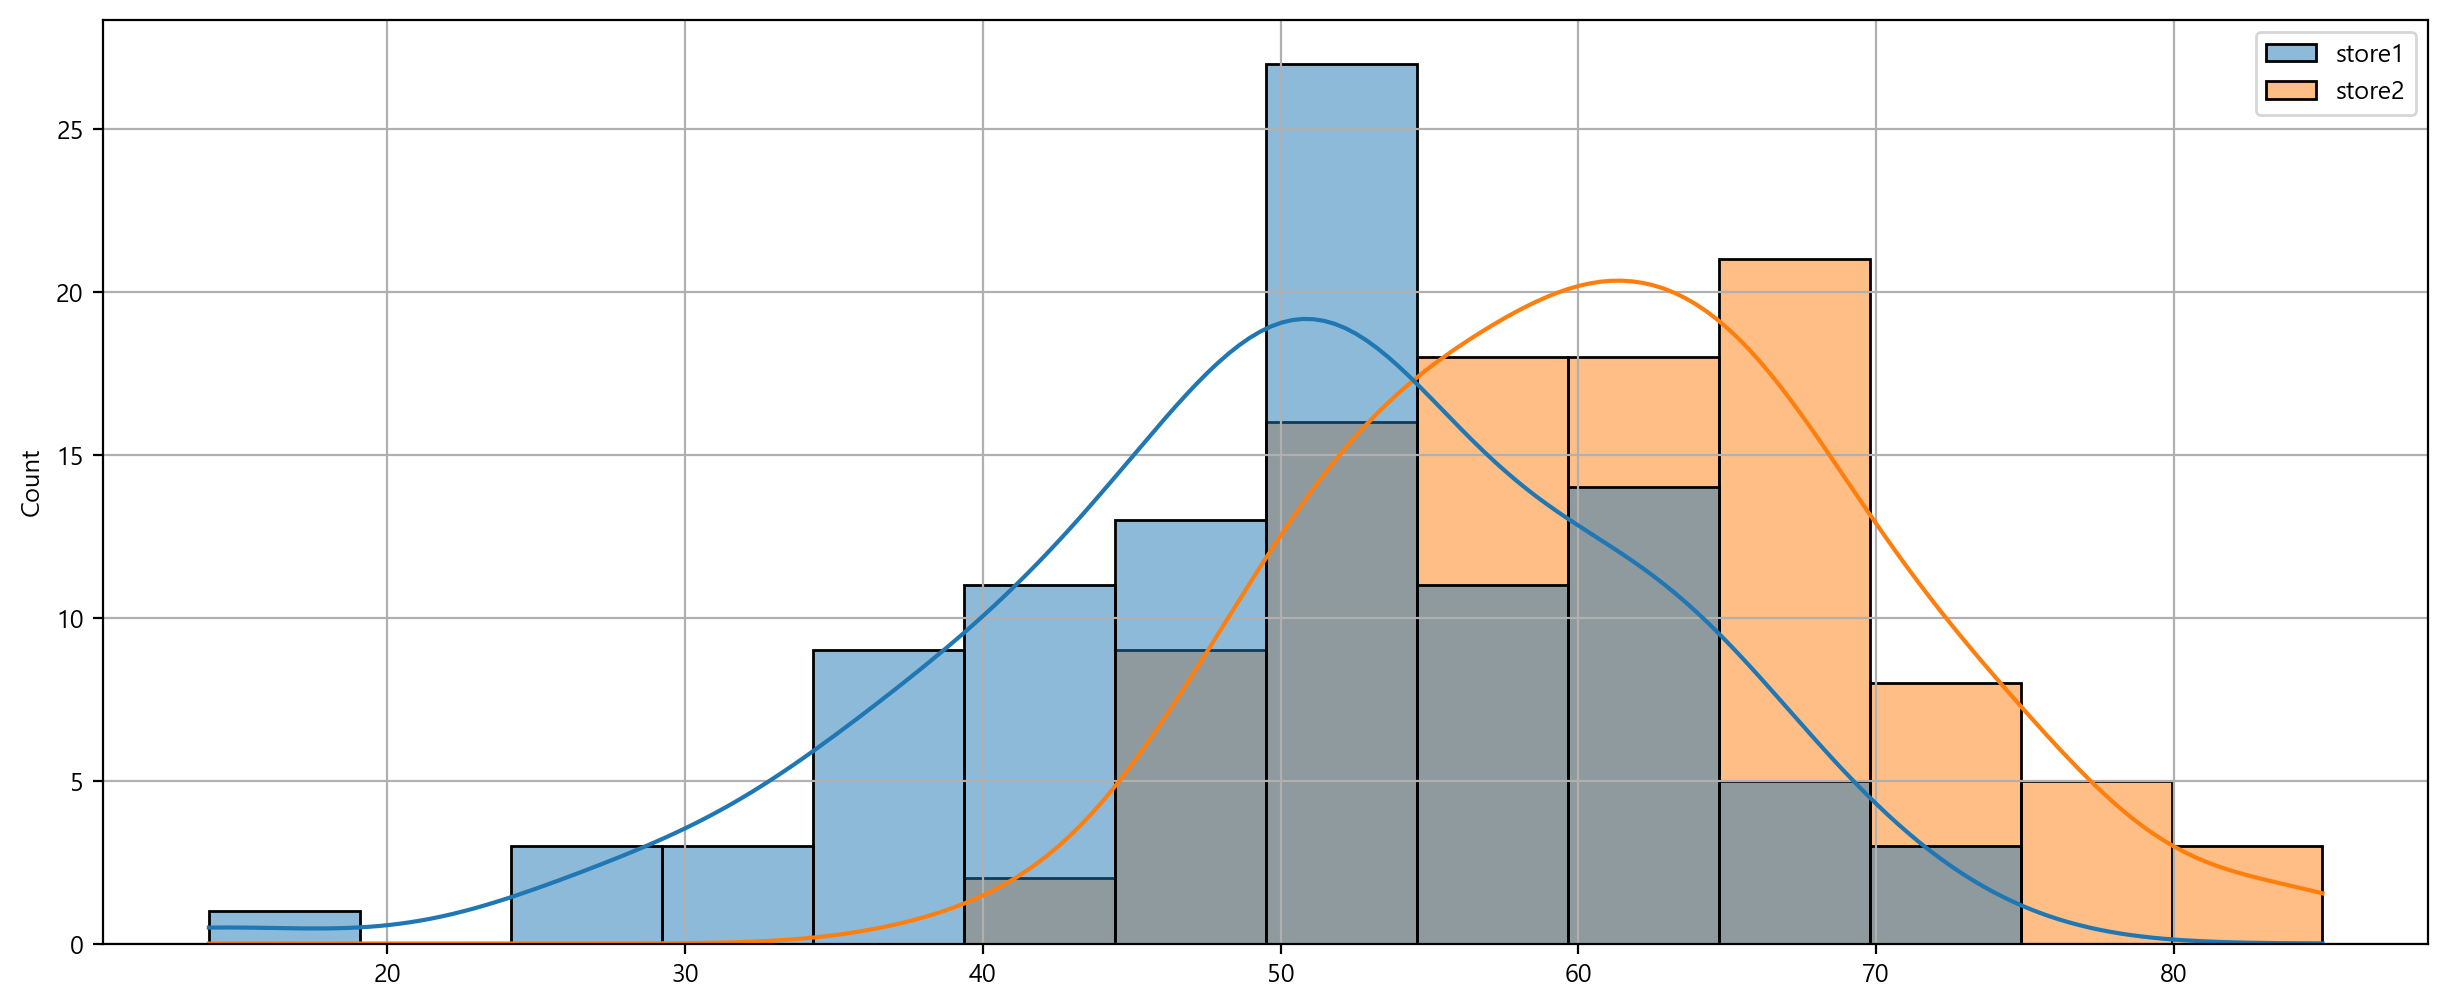

In [4]:
plt.figure()
sb.histplot(origin, kde=True)
plt.grid()
plt.show()
plt.close()

> 대충 정규분포인것 같은데?

## #02. 데이터 정규성 확인

데이터의 정규성을 검정하는 방법에는 Shapiro Wilk 검정, Normal Test검정이 있다.

| 가설 | 내용 | 설명 |
|---|---|---|
| 귀무가설($H_0$) | $P >= 0.05$ | 집단간 데이터 분포에는 차이가 없다(정규성을 따름) |
| 대립가설($H_1$) | $P < 0.05$ | 집단간 데이터 분포에는 차이가 있다(정규성을 따르지 않음) |

### [1] Shapiro Wilk 검정

Shapiro Wilk 검정은 매우 엄격하고 이를 충족하기 위해서는 이상치가 없어야 하며 좌우 대칭도 거의 완전해야 하기 때문에 현실에서 이 기준에 맞는 데이터는 없다고 보는 것이 맞다.

> 예제 데이터는 정규분포를 충족하는 난수 형태로 생성하였다.

#### (1) store1에 대한 정규성 확인

In [5]:
s, p = shapiro(origin['store1'])
"statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}".format(s, p, p >= 0.05)

'statistic: 0.979, p-value: 0.109, 정규성 충족 여부: True'

> `p-value`가 `0.109`이므로 ($p>0.05$) store1의 매출 데이터는 정규성을 따른다.

#### (2) store2에 대한 정규성 확인

In [6]:
s, p = shapiro(origin['store2'])
"statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}".format(s, p, p >= 0.05)

'statistic: 0.991, p-value: 0.731, 정규성 충족 여부: True'

> `p-value`가 `0.731`이므로 ($p>0.05$) store2의 매출 데이터는 정규성을 따른다.

> 하지만 이런 데이터 거의 없다니깐?

### [2] Normal Test

왜도(skew)와 첨도(kurtosis)를 통해 정규성을 검정한다.

West 등(1995)의 연구에 따르면 정규분포 기준은 $|왜도| < 2$, $|첨도| < 7$이면 정규분포에서 크게 벗어나지 않아 정규성을 충족한다고 볼 수 있다.

Shapiro 검정에 비해 느슨한 기준이기 때문에 많은 논문에서 많이 인용되고 있다.

#### (1) 왜도와 첨도 직접 구하기

##### `store1`의 왜도

분포의 비대칭도.

| 구분 | 내용 |
|---|---|
| 정규분포 | $왜도=0$ |
| 왼쪽으로 치우침 | $왜도 > 0$ |
| 오른쪽으로 치우침 | $왜도 < 0$ |

$|왜도| < 2$ 인 경우 정규성을 충족하는 것으로 판단한다.

In [7]:
s = skew(origin['store1'])
print("왜도: %0.3f" % s)
print("왜도의 절대값: %0.3f" % abs(s))

왜도: -0.506
왜도의 절대값: 0.506


> 왜도의 절대값이 0.51이므로 정규성을 충족한다.

##### `store1`의 첨도

분포의 뽀족한 정도

| 구분 | 내용 |
|---|---|
| 정규분포 | $첨도 = 0$ |
| 위로 뾰족함 | $첨도 > 0$ |
| 아래로 뾰족함 | $첨도 < 0$ |

$|첨도| < 7$인 경우 정규성을 충족하는 것으로 판단한다.

In [8]:
k = kurtosis(origin['store1'])
print("첨도: %0.3f" % k)
print("첨도의 절대값: %0.3f" % abs(k))

첨도: 0.422
첨도의 절대값: 0.422


> 첨도의 절대값이 0.42이므로 정규성을 충족한다.

##### store2에 대한 왜도와 첨도 확인

In [9]:
s = skew(origin['store2'])
k = kurtosis(origin['store2'])
print("왜도의 절대값: %0.3f, 첨도의 절대값: %0.3f" % (abs(s), abs(k)))

왜도의 절대값: 0.251, 첨도의 절대값: 0.178


> $|왜도| < 2$, $|첨도| < 7$ 조건에 부합하므로 정규성을 충족한다.

#### (2) NormalTest를 통한 정규성 검정

왜도와 첨도를 활용한 정규성 검정이므로 위에서 왜도와 첨도를 일일이 구할 필요가 없다.

> 앞으로의 수업 예제들은 NormalTest를 기준으로 정규성을 판단한다.

##### `store1`의 정규성 확인

In [10]:
s, p = normaltest(origin['store1'])
"statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}".format(s, p, p >= 0.05)

'statistic: 5.651, p-value: 0.059, 정규성 충족 여부: True'

> `p-value`가 `0.059`이므로 ($p>0.05$) store1의 매출 데이터는 정규성을 따른다.

##### `store2`의 정규성 확인

In [12]:
s, p = normaltest(origin['store2'])
"statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}".format(s, p, p >= 0.05)

'statistic: 1.174, p-value: 0.556, 정규성 충족 여부: True'

> `p-value`가 `0.556`이므로 ($p>0.05$) store1의 매출 데이터는 정규성을 따른다.

##### 반복문으로 한번에 처리하기

In [13]:
for c in origin.columns:
    s, p = normaltest(origin[c])
    print("[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(c, s, p, p >= 0.05))

[store1] statistic: 5.651, p-value: 0.059, 정규성 충족 여부: True
[store2] statistic: 1.174, p-value: 0.556, 정규성 충족 여부: True


## #03. 데이터 등분산성 확인

| 가설 | 내용 | 설명 |
|---|---|---|
| 귀무가설($H_0$) | $P >= 0.05$ | 집단간 분산의 차이가 없다 |
| 대립가설($H_1$) | $P < 0.05$ | 집단간 분산의 차이가 있다 |

### [1] Bartlett 검정

정규분포를 따르는 데이터의 집단간 분산이 같은지 다른지 여부를 알아볼 때 사용

In [14]:
# 파라미터 수의 제한이 없다.
s, p = bartlett(origin['store1'], origin['store2'])
print("Bartlett 검정: statistic: {0:.3f}, p-value: {1:.3f}, 등분산성 충족 여부: {2}".format(s, p, p >= 0.05))

Bartlett 검정: statistic: 2.844, p-value: 0.092, 등분산성 충족 여부: True


### [2] 레빈 검정(Levene's test)

데이터가 정규분포를 따르지 않을 경우 사용할 수 있는 방법

이 예제의 데이터에서는 적합하지 않은 방법이지만 여기서는 코드의 전개 과정을 제시하기 위해 사용함

In [16]:
# 파라미터 수의 제한이 없다.
s, p = levene(origin['store1'], origin['store2'])
print("Levene 검정: statistic: {0:.3f}, p-value: {1:.3f}, 등분산성 충족 여부: {2}".format(s, p, p >= 0.05))

Levene 검정: statistic: 1.360, p-value: 0.245, 등분산성 충족 여부: True


### [3] 반복문으로 한번에 처리하기

In [19]:
normal_dist = True      # 정규성 만족 여부
data = origin.copy()    # 원본 데이터 복사

fields = list(map(lambda x: data[x], data.columns))
                        # map은 data의 컬럼명 값을 data['컬럼명'] 형식으로 만들어주고, 
                        # 각각을 리스트에 넣어줌

if normal_dist: # 정규분포를 만족한다면
    n = "Bartlett"
    s, p = bartlett(*fields)
else:   # 정규분포를 만족하지 않는다면
    n = "Levene"
    s, p = levene(*fields)
    
print("{0} 검정: statistic: {1:.3f}, p-value: {2:.3f}, 등분산성 충족 여부: {3}".format(n, s, p, p >= 0.05))

Bartlett 검정: statistic: 2.844, p-value: 0.092, 등분산성 충족 여부: True
